In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
### Partie A - Les données
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
# Téléchargement des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0] # N = 60 000 données
# Données d'apprentissage X
X_train = np.reshape(X_train_data,(N,784)) # vecteur image
X_train = X_train/255 # normalisation
# Données d'apprentissage Y vers une liste de taille 10
Y_train = to_categorical(Y_train_data, num_classes=10)
# Données de test
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
### Partie B - Le réseau de neurones
p = 8
modele = Sequential()
# Première couche : p neurones (entrée de dimension 784 = 28x28)
modele.add(Dense(p, input_dim=784, activation='sigmoid'))
# Deuxième couche : p neurones
modele.add(Dense(p, activation='sigmoid'))
# Couche de sortie : 1O neurones (un par chiffre)
modele.add(Dense(10, activation='softmax'))
# La fonction d'activation 'softmax'sera décrite dans le paragraphe suivant.
# Choix de la méthode de descente de gradient
modele.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
# La fonction d'erreur 'categorical_crossentropy'est décrite dans le paragraphe suivant.
# L'optimisation 'sgd'est décrite dans le paragraphe suivant.
# 'accuracy'est décrite dans le paragraphe suivant.
print(modele.summary())

/home/iut45/Etudiants/o22202319/local/mod/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-04 12:14:48.943752: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [69]:
### Partie C - Calcul des poids par descente de gradient
modele.fit(X_train, Y_train, batch_size=32, epochs=40)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.9215 - loss: 0.2778
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.9232 - loss: 0.2726
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9222 - loss: 0.2741
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.9238 - loss: 0.2751
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.9250 - loss: 0.2683
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.9252 - loss: 0.2711
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9260 - loss: 0.2637
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.9268 - loss: 0.2638
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.9258 - loss: 0.2674
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9250 - loss: 0.2675
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.9243 - loss: 0.2697
Epoch 12

In [70]:
### Partie D - Résultats
resultat = modele.evaluate(X_test, Y_test, verbose=0)
print("Valeur de l'erreur sur les données de test (loss):", resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])

Valeur de l'erreur sur les données de test (loss): 0.2702787220478058
Précision sur les données de test (accuracy): 0.9235000014305115


In [72]:
import matplotlib.pyplot as plt
import random

In [73]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


Sortie réseau [5.5177027e-04 1.8485858e-04 1.9205131e-03 5.9975544e-03 4.9718287e-02
 1.4270570e-03 7.7008212e-05 2.8779782e-02 1.7576280e-01 7.3558044e-01]
Chiffre attendu : 8
Chiffre prédit : 9


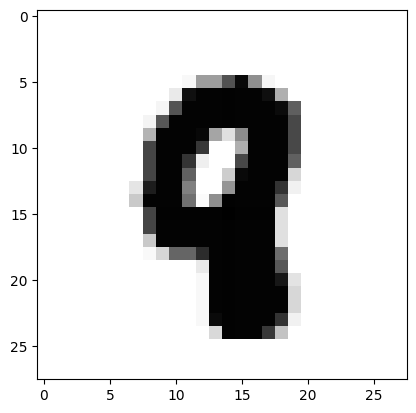

In [223]:
# Un exemple
i = random.randint(0, X_test.shape[0]) # numéro de l'image
chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)
plt.imshow(X_test_data[i], cmap='Greys')
plt.show()